In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- The first thing I did was to check the information about a DataFrame including the index dtype and columns. 
    + 150 entries that was missing values in 'rating' column -> replacing with 0
    + 'price' column was object datatype and had some values as 'unlisted' -> replacing with the overall median price
- I used .value_counts() function to check categorical values in 'category', 'animal' and 'size'
    + 25 unreasonable values as '-' in 'category' column -> replacing with 'Unknown'
    + Converting values in 'size' to be capitalized.

In [2]:
pet_supplies = pd.read_csv('pet_supplies_2212.csv')
pet_supplies.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [3]:
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [4]:
for i in ['category', 'animal', 'size']:
    print(f'Values in "{i}" \n{pet_supplies[i].value_counts()}\n')

Values in "category" 
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

Values in "animal" 
Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

Values in "size" 
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64



In [5]:
pet_supplies = pet_supplies.fillna({'rating':0})
pet_supplies['price'] = pet_supplies['price'].replace('unlisted', 0)
median_price = pet_supplies['price'].median()
pet_supplies['price'] = pet_supplies['price'].replace(0, median_price)
pet_supplies['price'] = pet_supplies['price'].astype(float)
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB


In [6]:
pet_supplies['category'] = pet_supplies['category'].replace('-','Unknown')
pet_supplies['size'] = pet_supplies['size'].str.capitalize()

In [7]:
for i in ['category', 'animal', 'size']:
    print(f'Values in "{i}" \n{pet_supplies[i].value_counts()}\n')

Values in "category" 
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64

Values in "animal" 
Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

Values in "size" 
Small     754
Medium    492
Large     254
Name: size, dtype: int64



In [8]:
repeat_supplies = pet_supplies[pet_supplies['repeat_purchase'] == 1]
repeat_supplies

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
10,11,Food,Dog,Large,40.87,1457.22,7.0,1
...,...,...,...,...,...,...,...,...
1490,1491,Medicine,Cat,Medium,20.14,746.16,7.0,1
1492,1493,Medicine,Cat,Small,24.95,993.08,7.0,1
1493,1494,Housing,Fish,Small,21.00,535.90,3.0,1
1498,1499,Medicine,Fish,Small,19.94,658.66,5.0,1


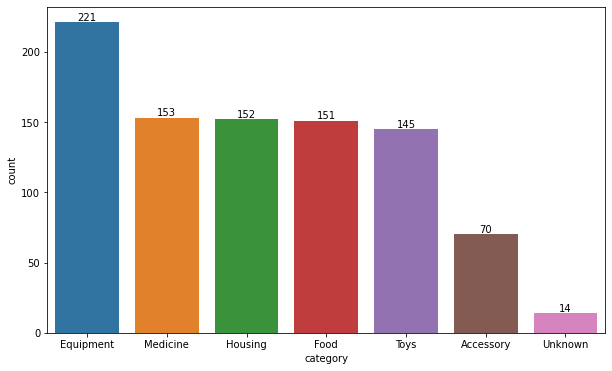

In [9]:
plt.figure(figsize=(10,6))
c = sns.countplot(data=repeat_supplies, x='category', order=repeat_supplies['category'].value_counts().index)
c.bar_label(c.containers[0])
plt.show()

In [10]:
pet_supplies['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

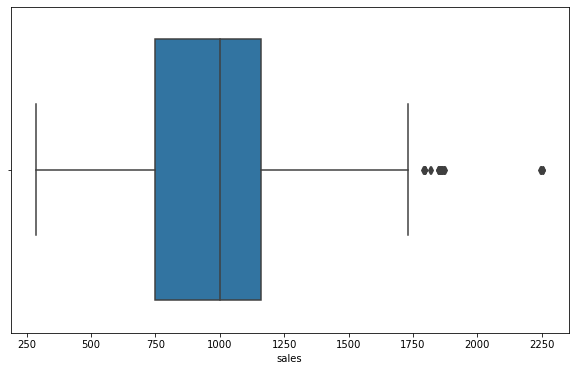

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=pet_supplies, x='sales')
plt.show()

In [12]:
# 75th percentile
per75 = pet_supplies['sales'].quantile(0.75)
# 25th percentile
per25 = pet_supplies['sales'].quantile(0.25)
# IQR
sales_iqr = per75 - per25
# upper/lower threshold
upper = per75 + 1.5*sales_iqr
lower = per25 - 1.5*sales_iqr
print(f'{per75}\n{per25}\n{sales_iqr}\n{upper}\n{lower}')

1158.1575
747.42
410.73750000000007
1774.26375
131.3137499999999


In [13]:
sale_no_outlier = pet_supplies[(pet_supplies['sales'] > lower) & (pet_supplies['sales'] < upper)]
sale_no_outlier['sales'].describe()

count    1457.000000
mean      969.668785
std       286.432446
min       286.940000
25%       743.830000
50%       989.830000
75%      1117.990000
max      1729.760000
Name: sales, dtype: float64

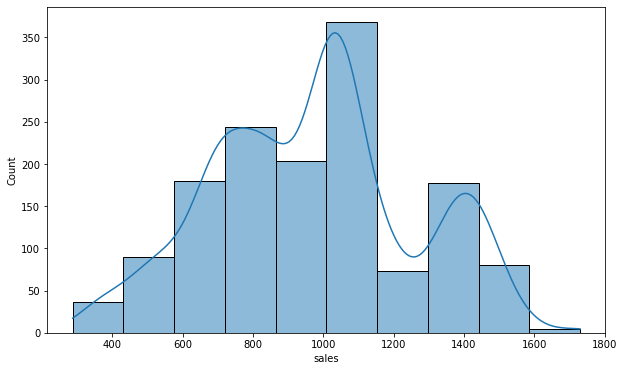

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=sale_no_outlier, x='sales', bins=10, kde=True)
plt.show()

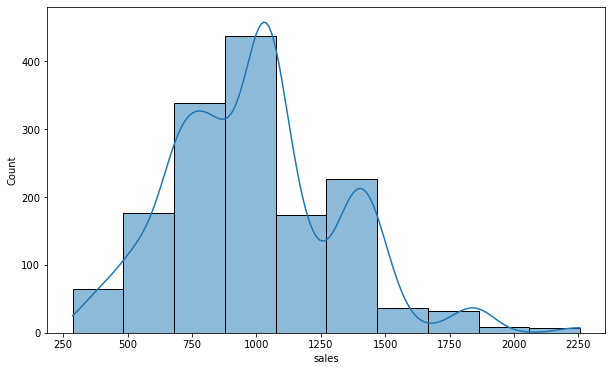

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=pet_supplies, x='sales', bins=10, kde=True)
plt.show()

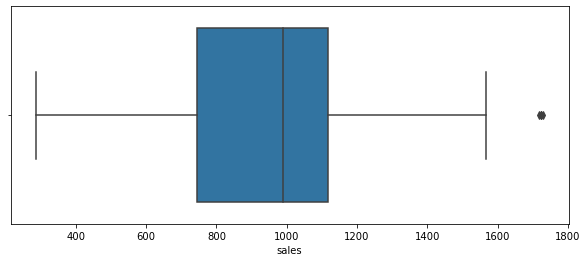

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(data=sale_no_outlier, x='sales')
plt.show()

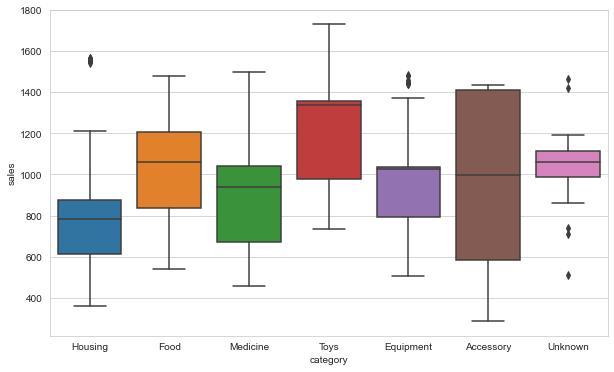

In [17]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.boxplot(data=sale_no_outlier, y='sales', x='category')
plt.show()

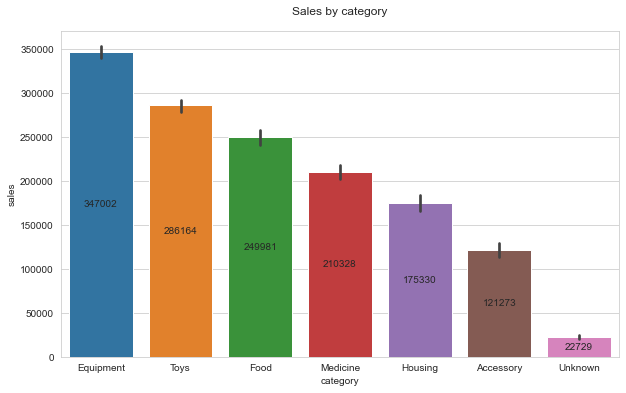

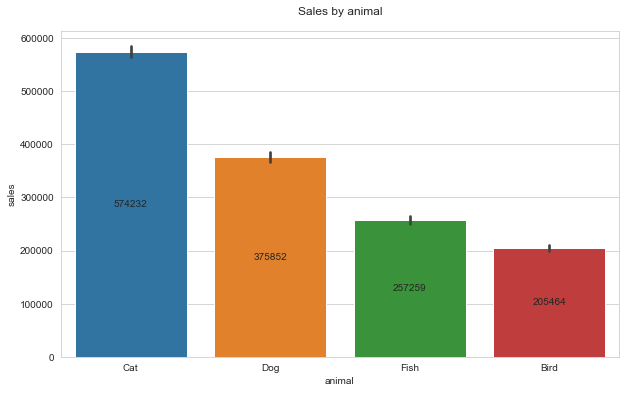

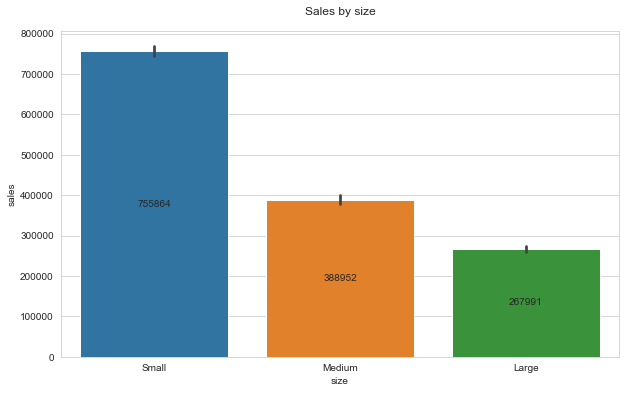

In [18]:

for i in ['category', 'animal', 'size']:
    plt.figure(figsize=(10,6))
    sorted_list = sale_no_outlier.groupby(i)['sales'].sum().sort_values(ascending=False).index
    g = sns.barplot(data=sale_no_outlier, y='sales', x=i, estimator=sum, order=sorted_list)
    g.set_title(f"Sales by {i}", y=1.03)
    g.bar_label(g.containers[0], label_type='center')
    plt.show()

In [19]:
sale_no_outlier['repeat_purchase'].value_counts(normalize=True)

1    0.601922
0    0.398078
Name: repeat_purchase, dtype: float64

In [20]:
grouped_df = sale_no_outlier.groupby('repeat_purchase', as_index=False).agg(nb_purchases=('product_id','count'),
                                                                            total_sales=('sales','sum'))
grouped_df

,repeat_purchase,nb_purchases,total_sales
0,0,580,583819.19
1,1,877,828988.23


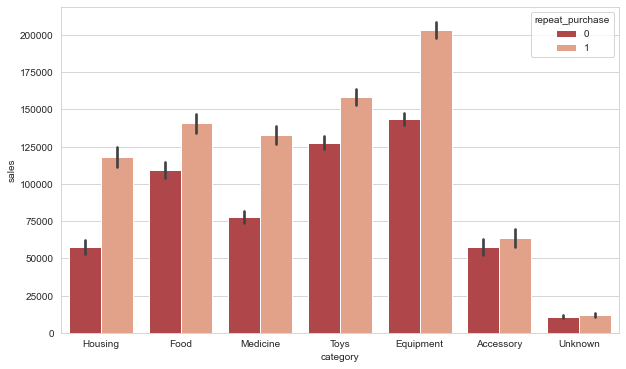

In [21]:
plt.figure(figsize=(10,6))
sns.set_palette('RdBu')
sns.barplot(data=sale_no_outlier, y='sales', x='category', estimator=sum, hue='repeat_purchase')
plt.show()

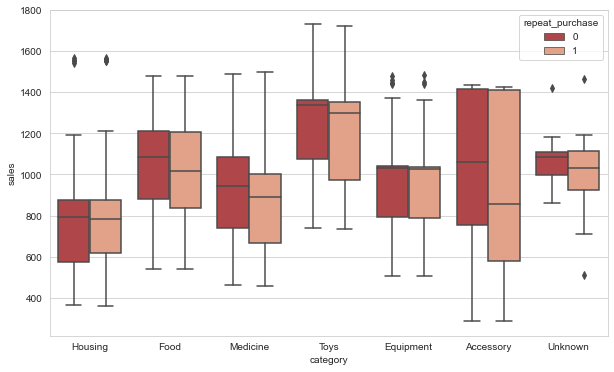

In [22]:
plt.figure(figsize=(10,6))
sns.set_palette('RdBu')
sns.boxplot(data=sale_no_outlier, y='sales', x='category', hue='repeat_purchase')
plt.show()

In [23]:
grouped_df = sale_no_outlier.groupby(['category','repeat_purchase'], as_index=False).agg(nb_purchases=('product_id','count'),
                                                                            total_sales=('sales','sum'))
grouped_df

,category,repeat_purchase,nb_purchases,total_sales
0,Accessory,0,56,57873.72
1,Accessory,1,70,63399.72
2,Equipment,0,149,143461.97
3,Equipment,1,220,203539.80
4,Food,0,103,109159.94
5,Food,1,137,140821.06
6,Housing,0,75,57299.10
7,Housing,1,152,118031.21
8,Medicine,0,83,77557.84
9,Medicine,1,152,132770.46
